# Task 1

## Q1:

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import csv
import datetime

file = pd.read_csv("Effects-of-COVID-19-on-trade.csv", index_col = 0)#load the csv file, no display the index

#Data Clean: get data without duplicate and change the format of the dates to “YYYY-MM-DD 
def date_convert(s):
    return datetime.datetime.strptime(s,"%d/%m/%y").strftime('%Y-%m-%d')

file["Current_Match"] = file["Current_Match"].apply(date_convert)
dates_with_dupes = file["Current_Match"]
dates_without_dupes = []
for elem in dates_with_dupes:
    if elem not in dates_without_dupes:
        dates_without_dupes.append(elem)
print(dates_without_dupes)

['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020

## Q2:

In [7]:
#Analyse the coloum country, some of them does not have a currency, ignore the 'All', 'East Asia (excluding China), and 'Total (excluding China)'
#Therefore there are 6 kinds of currency left
country=file['Country'].value_counts()
country


All                            20952
China                          11616
United States                   3492
East Asia (excluding China)     2328
Australia                       2328
United Kingdom                  2328
Japan                           1164
Total (excluding China)         1164
European Union (28)             1164
Name: Country, dtype: int64

In [3]:
import requests
from bs4 import BeautifulSoup
#bulid up 6 empty lists to store the 6 kinds currency name crawled from mthe website
usd_n=[]
eur_n=[]
gbp_n=[]
aud_n=[]
jpy_n=[]
cny_n=[]

#bulid up 6 empty lists to store the rates of Units_Per_NZD crawled from mthe website
usd_rates=[]
eur_rates=[]
gbp_rates=[]
aud_rates=[]
jpy_rates=[]
cny_rates=[]

#bulid up 6 empty lists to store the rates of NZD_Per Unit crawled from mthe website
usd_rates2=[]
eur_rates2=[]
gbp_rates2=[]
aud_rates2=[]
jpy_rates2=[]
cny_rates2=[]

#Pass each date from list in Current_Match coloumn to url, generate a for loop to crawled the data in each day.
for page in dates_without_dupes:
    url = "https://www.xe.com/currencytables/?from=NZD&date=%s#table-section"%(page)
    r = requests.get(url)
    bs = BeautifulSoup(r.content)
    table = bs.find("table", class_ = "currencytables__Table-xlq26m-3 jaGdii").find('tbody')
    
    #get values from the web page 
    usd_name=table.find_all('tr')[0].find_all('td')[0].get_text()
    usd_per_nzd=table.find_all('tr')[0].find_all('td')[1].get_text()
    nzd_per_usd=table.find_all('tr')[0].find_all('td')[2].get_text()
   
    
    eur_name=table.find_all('tr')[1].find_all('td')[0].get_text()
    eur_per_nzd=table.find_all('tr')[1].find_all('td')[1].get_text()
    nzd_per_eur=table.find_all('tr')[1].find_all('td')[2].get_text()
    
    gbp_name=table.find_all('tr')[2].find_all('td')[0].get_text()
    gbp_per_nzd=table.find_all('tr')[2].find_all('td')[1].get_text()
    nzd_per_gbp=table.find_all('tr')[2].find_all('td')[2].get_text()
    
    aud_name=table.find_all('tr')[4].find_all('td')[0].get_text()
    aud_per_nzd=table.find_all('tr')[4].find_all('td')[1].get_text()
    nzd_per_aud=table.find_all('tr')[4].find_all('td')[2].get_text()
    
    jpy_name=table.find_all('tr')[9].find_all('td')[0].get_text()
    jpy_per_nzd=table.find_all('tr')[9].find_all('td')[1].get_text()
    nzd_per_jpy=table.find_all('tr')[9].find_all('td')[2].get_text()
    
    cny_name=table.find_all('tr')[10].find_all('td')[0].get_text()
    cny_per_nzd=table.find_all('tr')[10].find_all('td')[1].get_text()
    nzd_per_cny=table.find_all('tr')[10].find_all('td')[2].get_text()
    
    #store each values in each corresponding list built:
    usd_n.append(usd_name)
    eur_n.append(eur_name)
    gbp_n.append(gbp_name)
    aud_n.append(aud_name)
    jpy_n.append(jpy_name)
    cny_n.append(cny_name)
    #composed then currency name in one list named other_currency:
    other_currency=usd_n+eur_n+gbp_n+aud_n+jpy_n+cny_n 
    
    
    #store each values in each corresponding list built:
    usd_rates.append(eur_per_nzd)
    eur_rates.append(eur_per_nzd)
    gbp_rates.append(gbp_per_nzd)
    aud_rates.append(aud_per_nzd)
    jpy_rates.append(jpy_per_nzd)
    cny_rates.append(cny_per_nzd)
    #composed then currency name in one list named units_per_nzd:
    units_per_nzd=usd_rates+eur_rates+gbp_rates+aud_rates+jpy_rates+cny_rates
    

    #store each values in each corresponding list built:
    usd_rates2.append(nzd_per_usd)
    eur_rates2.append(nzd_per_eur)
    gbp_rates2.append(nzd_per_gbp)
    aud_rates2.append(nzd_per_aud)
    jpy_rates2.append(nzd_per_jpy)
    cny_rates2.append(nzd_per_cny)
    #composed then currency name in one list named nzd_per_unit:
    nzd_per_unit=usd_rates2+eur_rates2+gbp_rates2+aud_rates2+jpy_rates2+cny_rates2
    


## Q3:

In [5]:
import csv
import pandas as pd

#composed 6 times the unique dats get from Q1 to make the correspond the data get from the websites.
unique_date=dates_without_dupes*6

#save the 4 columns as csv file
with open("Task1_Group19.csv", "w", encoding = "utf-8") as wf:
    writer = csv.writer(wf, quoting=csv.QUOTE_ALL)
    header = ['Unique_Date', 'Other_Currency', 'Units_Per_NZD', 'NZD_Per_Unit']
    table_dic = {'Unique_Date': unique_date, 'Other_Currency': other_currency, 'Units_Per_NZD': units_per_nzd,'NZD_Per_Unit':nzd_per_unit}  
    dataframe = pd.DataFrame(table_dic) 
    dataframe.to_csv('Task1_Group19.csv',index=False)
    dataframe  

,Unique_Date,Other_Currency,Units_Per_NZD,NZD_Per_Unit
0,2020-02-01,US Dollar,0.5826817390,1.5471385956
1,2020-02-02,US Dollar,0.5826282960,1.5471754286
2,2020-02-03,US Dollar,0.5841777575,1.5473730371
3,2020-02-04,US Dollar,0.5867063601,1.5434018170
4,2020-02-05,US Dollar,0.5885930677,1.5437355590
...,...,...,...,...
1159,2020-08-08,Chinese Yuan Renminbi,4.5966446543,0.2175499903
1160,2020-08-09,Chinese Yuan Renminbi,4.5963976293,0.2175616821
1161,2020-08-10,Chinese Yuan Renminbi,4.5878969863,0.2179647893
1162,2020-08-11,Chinese Yuan Renminbi,4.5678640387,0.2189207016


# Task 2

## Q1:

In [4]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-NZ', tz=720)  #parameter tz is the time difference between UTC and current locale(NZ)
#import matplotlib.pyplot as plt
Trending_topics = TrendReq(hl='en-US', tz=720)

#find the date in dates_without_dupes list from Task1 Step1
start_date=dates_without_dupes[0]
start_date
end_date=dates_without_dupes[-1]
end_date

'2020-02-01'

'2020-08-12'

In [14]:
#pass the last result to the dataframe, and pass the keywords
kw_list=["Coronavirus", "COVID", "COVID-19"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='2020-02-01 2020-08-12', geo='NZ')

data = Trending_topics.interest_over_time()
data

#data_sort = data.sort_values(by="date",ascending = True)

#data_sort

,Coronavirus,COVID,COVID-19,isPartial
date,,,,
2020-02-01,20,0,0,False
2020-02-02,14,0,0,False
2020-02-03,14,0,0,False
2020-02-04,13,0,0,False
2020-02-05,11,0,0,False
...,...,...,...,...
2020-08-08,5,9,1,False
2020-08-09,4,10,1,False
2020-08-10,5,10,1,False


In [25]:

pytrends = TrendReq(hl='en-NZ', tz=720)  #parameter tz is the time difference between UTC and current locale(NZ)
#import matplotlib.pyplot as plt
Trending_topics = TrendReq()
kw_list=["Jordan Chan","jordan",'lauren liang',"jordan chan"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='2023-01-05 2023-01-10', geo='NZ')

data = Trending_topics.interest_over_time()
data

,Jordan Chan,jordan,lauren liang,jordan chan,isPartial
date,,,,,
2023-01-05,0,82,0,0,False
2023-01-06,0,75,0,0,False
2023-01-07,0,72,0,0,False
2023-01-08,0,100,0,0,False
2023-01-09,0,87,0,0,False
2023-01-10,0,83,0,0,False


## Q2:

<AxesSubplot:xlabel='date'>

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

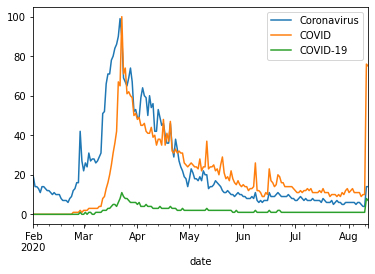

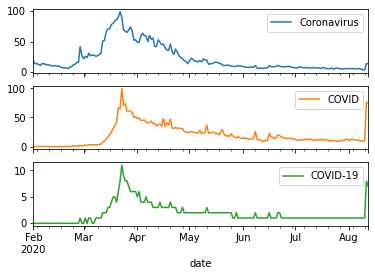

In [13]:
data.plot()
data.plot(subplots=True)

The general trends of all three keywords are similar. In early February, a coronavirus epidemic exploded in China and other countries, so New Zealand imposed travel restrictions on China. Therefore the google trends of the keyword 'Coronavirus' has attention. And the other two keywords almost had no attention because WHO just named the coronavirus 'COVID-19' on 11 Feb; they were new entries. The keyword 'COVID-19' became more popular than 'Coronavirus' from the mid-month of March as the word covid appeared in the news more frequently. The number of searches for covid 19 has been relatively low because 'COVID-19' is a more professional word that appears in news and articles, and people may not like to switch keyboards and type numbers and punctuation.

The google trends of 'Coronavirus' started to grow at the end of February because the first case appeared in New Zealand on 28 Feb. In early March, as the number of cases gradually increased, the three graphs gradual increase the number of cases. The graphs peaked around the end of March because it was the first time in New Zealand's history that the border was closed on 20 Mar, and Auckland City Council closed down the community public facilities. Community transmission began on 23 Mar, and the national alert level of 3 was raised to 4 after 48 hours, and the era of lockdown in New Zealand started.

Then the attention of google trends of these three keywords decreased as the epidemic got better. A sharp boost on 11 Aug happened because there was a new case after 102 days of no growth, and Auckland moved to level 3.

## Q3:

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

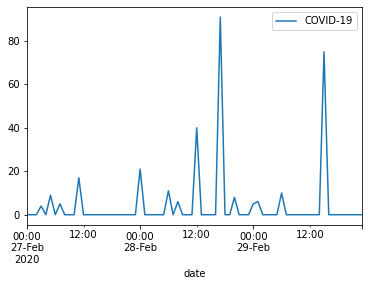

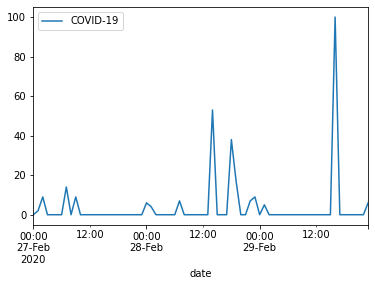

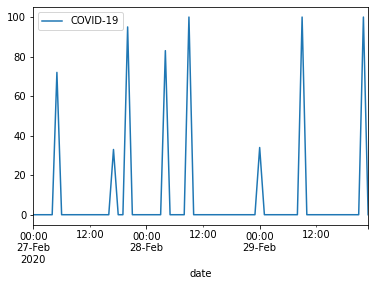

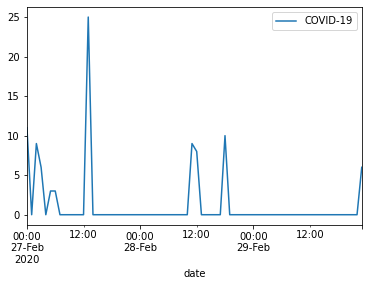

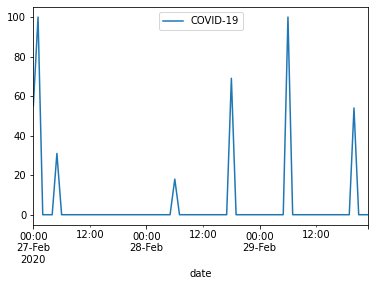

In [22]:
#default is 'web searches',others include 'images','news','youtube','froogle' (google shopping) 
import pandas as dp
kw_list1=["COVID-19"]
web=pytrends.get_historical_interest(kw_list1, year_start=2020, month_start=2, 
day_start=27, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo='NZ', gprop='', sleep=0)

image=pytrends.get_historical_interest(kw_list1, year_start=2020, month_start=2,
day_start=27, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo='NZ', gprop='images',sleep=0)

news=pytrends.get_historical_interest(kw_list1, year_start=2020, month_start=2,
day_start=27, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo='NZ', gprop='news',sleep=0)

youtube_search=pytrends.get_historical_interest(kw_list1, year_start=2020, month_start=2,
day_start=27, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo='NZ', gprop='youtube',sleep=0)

gle_shopping=pytrends.get_historical_interest(kw_list1, year_start=2020, month_start=2,
day_start=27, hour_start=0, year_end=2020, month_end=2, day_end=29, hour_end=23, cat=0, geo='NZ', gprop='froogle',sleep=0)

#Displaying 5 plots separately to show the change of 5 different search types clearly.
web.plot()
image.plot()
news.plot()
youtube_search.plot()
gle_shopping.plot()
